# ANN in classification Fraud data with neural nets

In [48]:
#pip install autokeras

In [49]:
# # ANN classification

# In[9]:


import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import numpy as np
from tensorflow.python.keras.layers import LayerNormalization
from keras.layers import LSTM, Dense,Flatten, Dropout, Activation, Conv1D, Conv2D, ReLU
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.utils import resample
from keras import optimizers
from sklearn.model_selection import train_test_split
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from sklearn import datasets
import imblearn
from keras.layers import BatchNormalization
from sklearn.preprocessing import LabelEncoder
#from autokeras import StructuredDataClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from sklearn.metrics import accuracy_score
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
# ## Load the data

# In[2]:




## import the data

In [ ]:
#Importing traing data
dataset = pd.read_csv('https://raw.githubusercontent.com/IBM/xgboost-smote-detect-fraud/master/data/creditcard.csv')
X = dataset.iloc[:, 0:30]
y = dataset.iloc[:, 30:31]


#preview
dataset.head()

In [3]:
X.shape

(56874, 30)

In [4]:

# scaling and standardizing

scaler = preprocessing.StandardScaler().fit(X)


X_scaled = scaler.transform(X)
X_scaled


array([[-1.99820491,  0.19366191,  0.38129036, ...,  0.09882734,
        -0.17868516, -0.33462126],
       [-1.99816284, -0.3945347 ,  0.21241036, ..., -0.45915227,
         0.4080227 , -0.30897149],
       [-1.99788936,  0.57079061,  0.05100844, ...,  0.06629938,
         0.00726596, -0.35830454],
       ...,
       [ 1.63622332, -0.45247491,  0.54269229, ..., -0.19892859,
         0.06818099, -0.2904609 ],
       [ 1.63634954,  0.96964688, -0.09232146, ...,  0.03877573,
        -0.13700646, -0.12083043],
       [ 1.63639162,  0.10830356,  0.54643133, ...,  0.44662629,
         0.68374334, -0.2745153 ]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(array([56772.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 45417.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

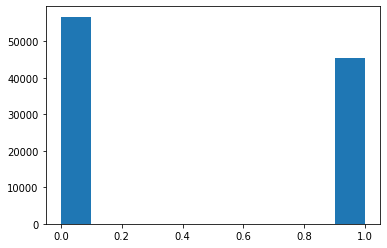

In [17]:
# In[14]:





# ## Oversampling imbalanced data 

# In[3]:





# In[32]:


# transform the dataset with Synthetic Minority Oversampling Technique
oversample = SMOTE(sampling_strategy=0.8)
Xo, yo = oversample.fit_resample(X_scaled, y)


# Split the data up in train and test sets

X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size=0.3, random_state=0)

counts, bins = np.histogram(yo)
plt.hist(bins[:-1], bins, weights=counts)

## setting early stopping

In [36]:
# define callbacks early stopping
DESIRED_ACCURACY = 0.9970

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= DESIRED_ACCURACY):
      print("\nReached 99.7% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [28]:
earlystop=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

## training the keras model

In [44]:



# In[33]:


#counts, bins = np.histogram(yo)
#plt.hist(bins[:-1], bins, weights=counts)


# ## Training the model 

# In[36]:
from tensorflow.keras.layers.experimental import preprocessing
from keras.regularizers import l2

keras.regularizers.l1_l2(l1=0.01, l2=0.01)


# Initialize the NN 
model = Sequential()

# Add input layer 
model.add(Dense(4,  input_shape=(30,), activation='relu'))
#model.add(Dropout(0.01))
#hidden layer
#model.add(ReLU())
model.add(Dense(4,  activation='relu', kernel_initializer='he_normal'))
#model.add(LayerNormalization())
model.add(BatchNormalization(momentum=0.7))

initializer = tf.keras.initializers.he_uniform
#layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

#model.add(Dense(4,  activation='relu',kernel_initializer=initializer,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))


model.add(Dropout(0.01))
# Add output layer 
model.add(Dense(1, activation='sigmoid'))
#encoder = preprocessing.CategoryEncoding()

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#tf.keras.models.Model(encoder)
model.summary()




Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 4)                 124       
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 20        
_________________________________________________________________
batch_normalization_10 (Batc (None, 4)                 16        
_________________________________________________________________
dropout_5 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 5         
Total params: 165
Trainable params: 157
Non-trainable params: 8
_________________________________________________________________


In [45]:

#train the model with shuffeling
history=model.fit(X_train, y_train,validation_split=0.4,epochs=20, batch_size=48, verbose=1, shuffle=True)#, callbacks=[callbacks])


# In[12]:





# ## Evaluating the model

# In[37]:


#evaluate the model
score = model.evaluate(X_test, y_test)
print(score)


# In[38]:



Epoch 1/20
895/895 [==============================] - 3s 2ms/step - loss: 0.1928 - accuracy: 0.9184 - val_loss: 0.0174 - val_accuracy: 0.9950
Epoch 2/20
895/895 [==============================] - 2s 2ms/step - loss: 0.0138 - accuracy: 0.9965 - val_loss: 0.0123 - val_accuracy: 0.9974
Epoch 3/20
895/895 [==============================] - 2s 2ms/step - loss: 0.0216 - accuracy: 0.9946 - val_loss: 0.0096 - val_accuracy: 0.9976
Epoch 4/20
895/895 [==============================] - 2s 2ms/step - loss: 0.0140 - accuracy: 0.9963 - val_loss: 0.0118 - val_accuracy: 0.9975
Epoch 5/20
895/895 [==============================] - 2s 2ms/step - loss: 0.0106 - accuracy: 0.9977 - val_loss: 0.0137 - val_accuracy: 0.9958
Epoch 6/20
895/895 [==============================] - 2s 2ms/step - loss: 0.0129 - accuracy: 0.9966 - val_loss: 0.0078 - val_accuracy: 0.9981
Epoch 7/20
895/895 [==============================] - 2s 2ms/step - loss: 0.0087 - accuracy: 0.9979 - val_loss: 0.0068 - val_accuracy: 0.9986
Epoch 

In [46]:
#evaluate the model
score = model.evaluate(X_test, y_test)
print(score)


959/959 [==============================] - 1s 1ms/step - loss: 0.0083 - accuracy: 0.9990
[0.008288261480629444, 0.9989562034606934]


## plot accuracy vs. oss curve

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


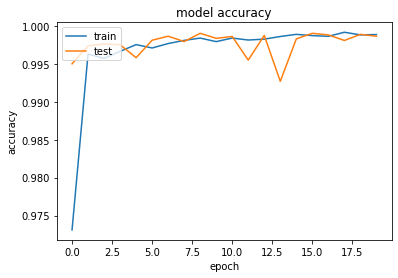

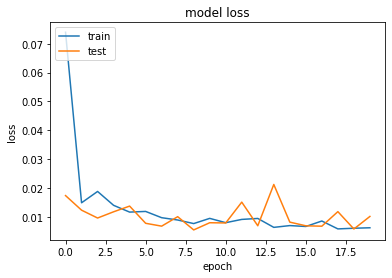

In [51]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Teil 2 : Autokeras

In [ ]:

#counts, bins = np.histogram(yo)
#plt.hist(bins[:-1], bins, weights=counts)


# ## Training the model 

# In[36]:

import keras
import tensorflow.keras as keras
from keras.models import load_model
from keras.models import Model

# Initialize the NN 
model = Sequential()

# Add input layer 
model.add(Dense(4,  input_shape=(30,), activation='relu'))
#model.add(Dropout(0.01))
#hidden layer

model.add(ReLU())
model.add(Dense(4,  activation='relu'))
model.add(LayerNormalization())
#model.add(CategoryEncoding())
layer = tf.keras.layers.experimental.preprocessing.CategoryEncoding()
#model.add(tf.keras.layers.experimental.preprocessing.CategoryEncoding())
#model.add(Dense(64,  activation='relu'))
#model.add(Dense(64,  activation='relu'))
#model.add(Dropout(0.01))
# Add output layer 
model.add(Dense(1, activation='sigmoid'))


opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



#train the model
#history=model.fit(X_train, y_train,validation_split=0.4,epochs=5, batch_size=100, verbose=1)


# In[12]:

models_= keras.Model(layer)
#tf.keras.Model(inputs=layers)
model.summary()


# ## Evaluating the model

# In[37]:


#evaluate the model
#score = model.evaluate(X_test, y_test)
#print(score)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 4)                 124       
_________________________________________________________________
re_lu_19 (ReLU)              (None, 4)                 0         
_________________________________________________________________
dense_54 (Dense)             (None, 4)                 20        
_________________________________________________________________
layer_normalization_17 (Laye (None, 4)                 8         
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 5         
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#pip install autokeras

## autokeras search for best model params

In [ ]:
# define the search
search = StructuredDataClassifier(max_trials=3,metrics=['accuracy'])

# perform the search
history=search.fit(x=X_train, y=y_train, epochs=20)
# evaluate the model
loss, acc = search.evaluate(X_test, y_test)
print('Accuracy: %.3f' % acc)
# use the model to make a prediction
#row = [0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032]

row=[10,0.385,0.616,-0.874,-0.094,2.925,3.317,0.470,0.538,-0.559,0.310,-0.259,-0.326,-0.090,0.363,0.929,-0.129,-0.810,0.360,0.708,0.126,0.050,0.238,0.009,0.997,-0.767,-0.492,0.042,-0.054,9.990]
#X_new = asarray([row]).astype('float32')
#yhat = search.predict(X_new)
#print('Predicted: %.3f' % yhat[0])
# get the best performing model
model = search.export_model()
# summarize the loaded model
model.summary()
# save the best performing model to file
#model.save('model_sonar.h5')

Trial 3 Complete [00h 01m 18s]
val_accuracy: 0.9997199773788452

Best val_accuracy So Far: 0.9999299645423889
Total elapsed time: 00h 04m 09s
INFO:tensorflow:Oracle triggered exit
Epoch 1/20
2236/2236 [==============================] - 5s 2ms/step - loss: 0.1255 - accuracy: 0.9577
Epoch 2/20
2236/2236 [==============================] - 4s 2ms/step - loss: 0.0060 - accuracy: 0.9989
Epoch 3/20
2236/2236 [==============================] - 4s 2ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 4/20
2236/2236 [==============================] - 4s 2ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 5/20
2236/2236 [==============================] - 4s 2ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 6/20
2236/2236 [==============================] - 4s 2ms/step - loss: 0.0010 - accuracy: 0.9998
Epoch 7/20
2236/2236 [==============================] - 4s 2ms/step - loss: 5.7438e-04 - accuracy: 0.9999
Epoch 8/20
2236/2236 [==============================] - 4s 2ms/step - loss: 3.1046e-04 - accuracy: 0.9

In [ ]:
(model.get_weights)

<bound method Model.get_weights of <tensorflow.python.keras.engine.functional.Functional object at 0x7f8a25941050>>


### accuracy scores

In [ ]:
score = search.evaluate(X_test, y_test)
print(score)

959/959 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 0.9998
[0.0015881425933912396, 0.9997716546058655]


In [ ]:
y_hat=search.predict(X_test)

print (y_test, " " , np.round(y_hat))  

#y_hat.reshape(1,-2)
y_hat.shape

[1 0 0 ... 0 0 0]   [[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


(30657, 1)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, np.round(y_hat), average=None)

array([0.99979244, 0.99974628])

In [ ]:
 from sklearn.metrics import accuracy_score

accuracy_score(y_test, np.round(y_hat))

0.9997716671559513

## evaluation the model los vs accuracy

In [ ]:
#evaluate the model
score = model.evaluate(X_test, y_test)
print(score)

959/959 [==============================] - 1s 1ms/step - loss: 8.6154e-05 - accuracy: 1.0000
[8.615421393187717e-05, 0.9999673962593079]


## plot the models loss vs. accuracy

In [ ]:
# list all data in history
#print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

AttributeError: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


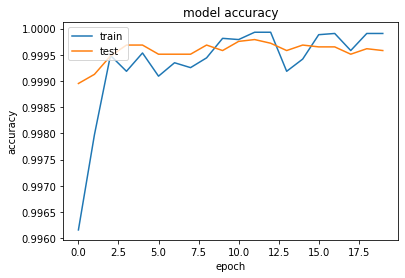

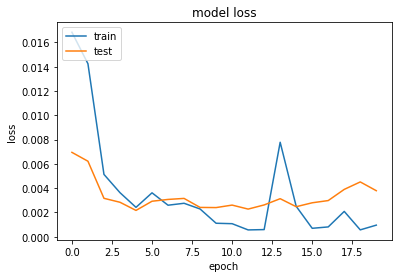

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


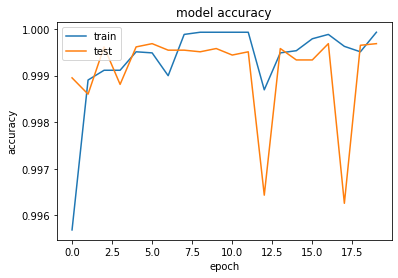

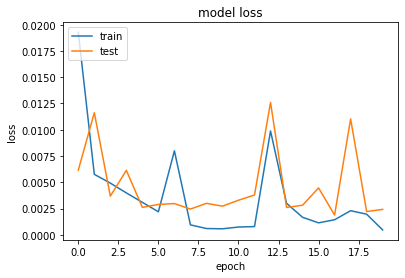

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


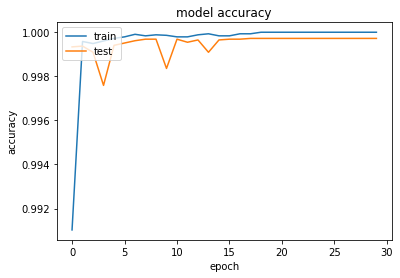

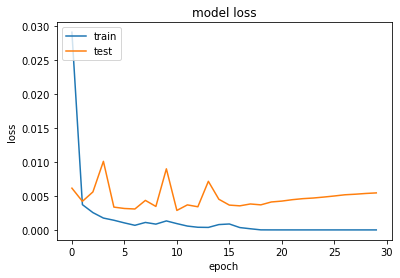

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


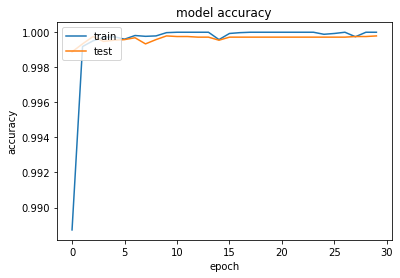

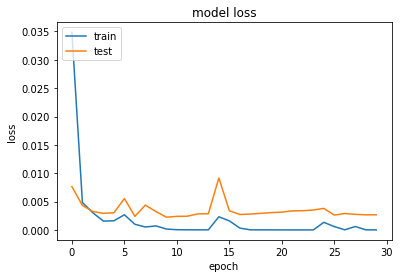

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


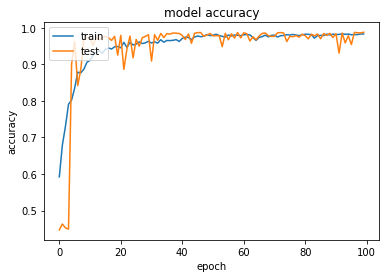

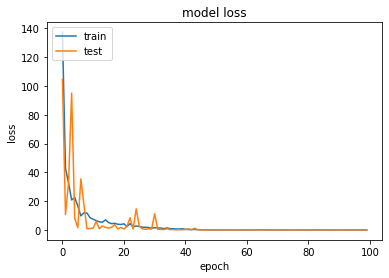

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


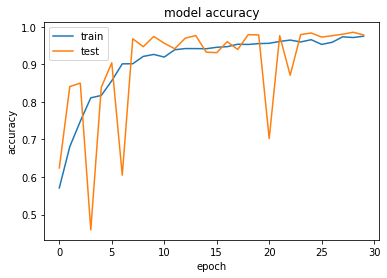

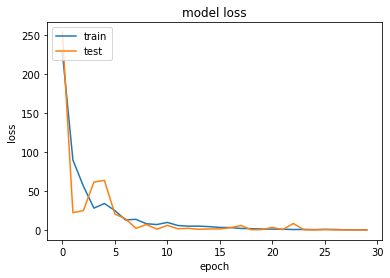

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


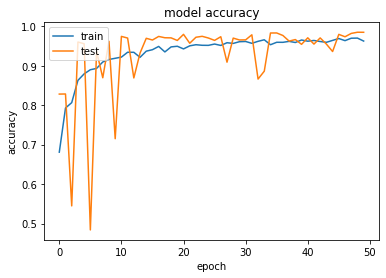

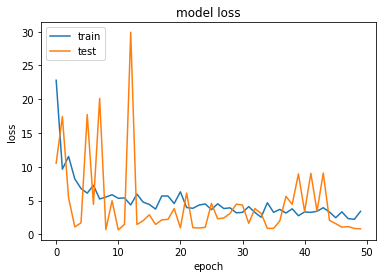

In [ ]:
  # list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


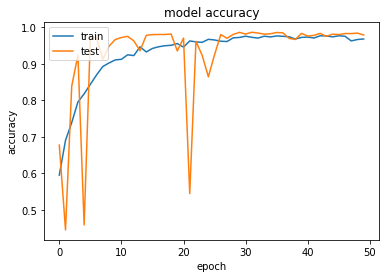

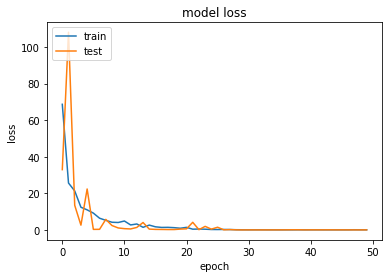

In [ ]:
 # list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


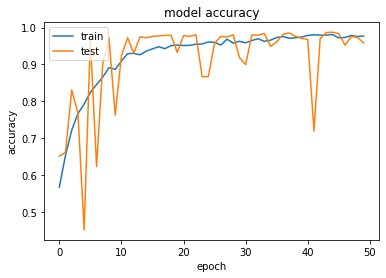

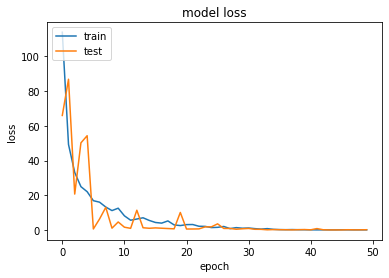

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()